# WeatherPy

---
Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0



    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    # Run an API request for each of the cities
    
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        
       


     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | greymouth
Processing Record 5 of Set 1 | jatai
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | nago
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | dolisie
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | tromso
Processing Record 19 of Set 1 | remire-montjoly
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processi

Processing Record 41 of Set 4 | kimbe
Processing Record 42 of Set 4 | san sebastian de la gomera
Processing Record 43 of Set 4 | qal'at bishah
City not found. Skipping...
Processing Record 44 of Set 4 | madaripur
Processing Record 45 of Set 4 | peace river
Processing Record 46 of Set 4 | banda aceh
Processing Record 47 of Set 4 | braganca
Processing Record 48 of Set 4 | palmer
Processing Record 49 of Set 4 | trincomalee
Processing Record 0 of Set 5 | flying fish cove
Processing Record 1 of Set 5 | chuhar jamali
Processing Record 2 of Set 5 | castillos
Processing Record 3 of Set 5 | quellon
Processing Record 4 of Set 5 | sosnovo-ozerskoye
Processing Record 5 of Set 5 | ulsteinvik
Processing Record 6 of Set 5 | mejit
Processing Record 7 of Set 5 | kataragama
City not found. Skipping...
Processing Record 8 of Set 5 | thunder bay
Processing Record 9 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 5 | wenchang
Processing Record 11 of Set 5 | moussoro
Processing

Processing Record 29 of Set 8 | dubbo
Processing Record 30 of Set 8 | qutqashen
Processing Record 31 of Set 8 | makokou
Processing Record 32 of Set 8 | st. john's
Processing Record 33 of Set 8 | snyder
Processing Record 34 of Set 8 | priargunsk
Processing Record 35 of Set 8 | puerto carreno
Processing Record 36 of Set 8 | sept-iles
Processing Record 37 of Set 8 | tarawa
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | natal
Processing Record 40 of Set 8 | maraba
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | mcgregor
Processing Record 43 of Set 8 | karabar
Processing Record 44 of Set 8 | ujae
Processing Record 45 of Set 8 | manghit
Processing Record 46 of Set 8 | embi
Processing Record 47 of Set 8 | vilino
Processing Record 48 of Set 8 | zhumysker
Processing Record 49 of Set 8 | saurimo
Processing Record 0 of Set 9 | ugoofaaru
Processing Record 1 of Set 9 | loreto
Processing Record 2 of Set 9 | ponta delgada
Processing Record 3 of Set 9 | b

Processing Record 20 of Set 12 | byron bay
Processing Record 21 of Set 12 | puerto baquerizo moreno
Processing Record 22 of Set 12 | konarka
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | port saint john's
Processing Record 25 of Set 12 | rexburg
Processing Record 26 of Set 12 | kuanda
Processing Record 27 of Set 12 | nyurba
Processing Record 28 of Set 12 | laojunmiao
Processing Record 29 of Set 12 | tanjung selor
City not found. Skipping...
Processing Record 30 of Set 12 | ketchikan
Processing Record 31 of Set 12 | brzeziny
Processing Record 32 of Set 12 | porbandar
Processing Record 33 of Set 12 | eastham
Processing Record 34 of Set 12 | pointe aux piments
Processing Record 35 of Set 12 | port hedland
Processing Record 36 of Set 12 | brookings
Processing Record 37 of Set 12 | lagoa
Processing Record 38 of Set 12 | nguigmi
Processing Record 39 of Set 12 | boende
Processing Record 40 of Set 12 | encruzilhada do sul
-----------------------------
Data R

In [4]:
 
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()



City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:


# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,24.44,49,20,1.54,US,1689976033
1,ushuaia,-54.8000,-68.3000,-1.19,69,75,6.69,AR,1689975783
2,punta arenas,-53.1500,-70.9167,-2.16,92,100,2.47,CL,1689976632
3,greymouth,-42.4667,171.2000,5.22,75,14,3.63,NZ,1689976632
4,jatai,-17.8814,-51.7144,22.57,45,2,3.02,BR,1689976633


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,24.44,49,20,1.54,US,1689976033
1,ushuaia,-54.8000,-68.3000,-1.19,69,75,6.69,AR,1689975783
2,punta arenas,-53.1500,-70.9167,-2.16,92,100,2.47,CL,1689976632
3,greymouth,-42.4667,171.2000,5.22,75,14,3.63,NZ,1689976632
4,jatai,-17.8814,-51.7144,22.57,45,2,3.02,BR,1689976633


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

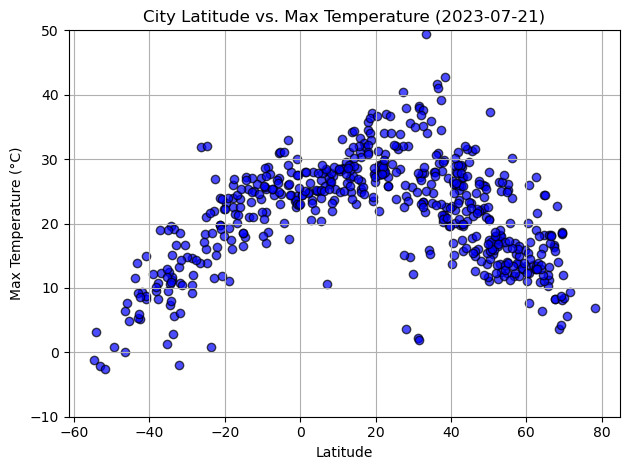

<Figure size 640x480 with 0 Axes>

In [8]:
# Scatter Plot: Latitude vs. Max Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", color="blue", alpha=0.7)
plt.xlabel("Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature (2023-07-21)")
plt.grid(True)
plt.ylim(-10, 50)
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

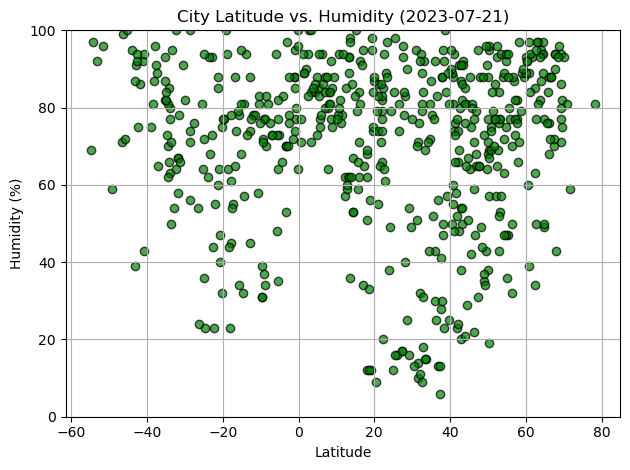

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", color="green", alpha=0.7)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-21)")
plt.grid(True)
plt.ylim(0, 100)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

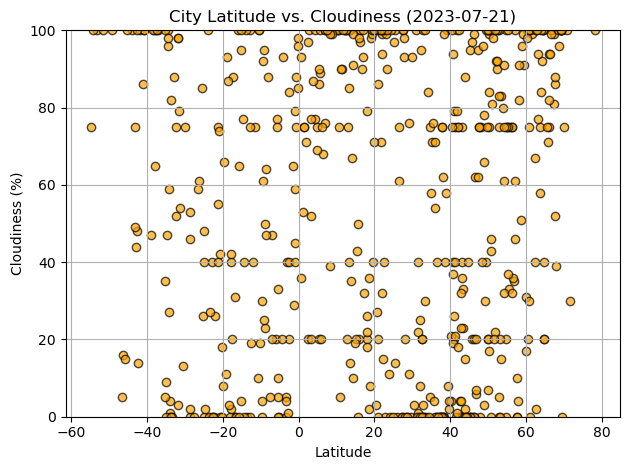

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", color="orange", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-21)")
plt.grid(True)
plt.ylim(0, 100)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

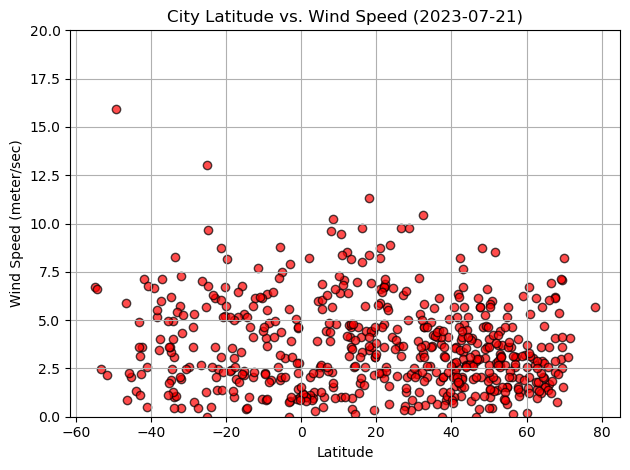

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", color="red", alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (meter/sec)")
plt.title("City Latitude vs. Wind Speed (2023-07-21)")
plt.grid(True)
plt.ylim(0, 20)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define the function to create a linear regression plot
def linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line values
    regression_line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y, edgecolors="black", alpha=0.7)
    plt.plot(x, regression_line, color="red", label="Regression Line")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display the correlation coefficient in the plot
    plt.annotate(f"Correlation: {r_value:.2f}", (min(x), max(y)), xytext=(10, -15), textcoords="offset points",
                 fontsize=10, color="blue")

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data for Northern Hemisphere

northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,24.44,49,20,1.54,US,1689976033
7,cabo san lucas,22.8909,-109.9124,37.01,61,0,5.69,MX,1689976200
8,hilo,19.7297,-155.0900,27.84,74,100,3.09,US,1689976462
10,nago,26.5881,127.9761,28.47,81,61,3.14,JP,1689976432
12,thompson,55.7435,-97.8558,20.09,77,75,3.60,CA,1689976635


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data for Southern Hemispher
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,-1.19,69,75,6.69,AR,1689975783
2,punta arenas,-53.1500,-70.9167,-2.16,92,100,2.47,CL,1689976632
3,greymouth,-42.4667,171.2000,5.22,75,14,3.63,NZ,1689976632
4,jatai,-17.8814,-51.7144,22.57,45,2,3.02,BR,1689976633
5,port-aux-francais,-49.3500,70.2167,0.87,59,100,15.95,TF,1689976634


###  Temperature vs. Latitude Linear Regression Plot

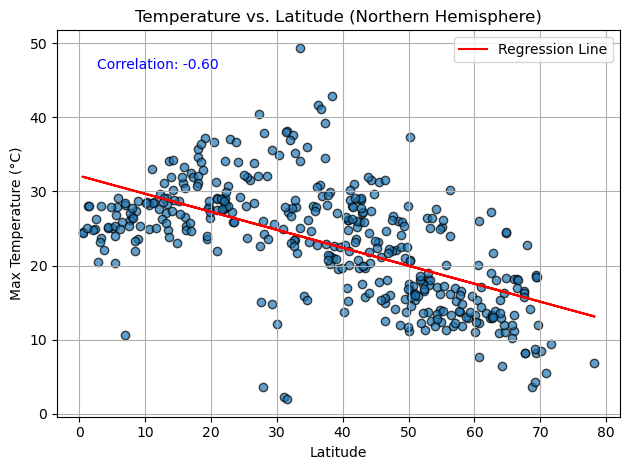

In [45]:
# Temperature vs. Latitude Linear Regression Plot
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°C)", "Temperature vs. Latitude (Northern Hemisphere)")


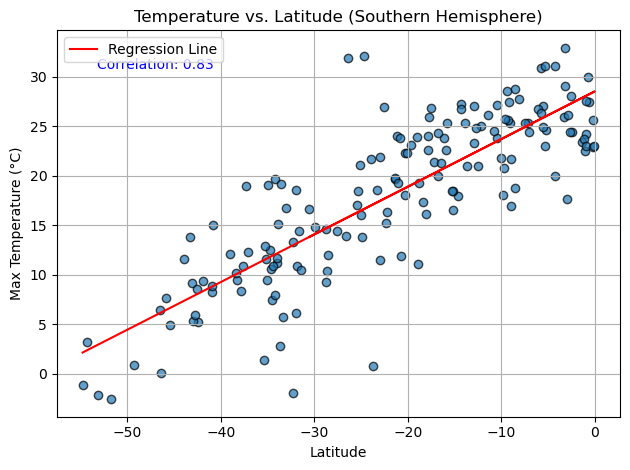

In [46]:
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°C)", "Temperature vs. Latitude (Southern Hemisphere)")

**Discussion about the linear relationship:**This scatter plot with a correlation of 0.83 shows a strong positive linear relationship between the two variables. The data points cluster around a line with a positive slope, indicating that when one variable increases, the other tends to increase as well. This insight is useful for predictive modeling and understanding the variables' behavior. 




### Humidity vs. Latitude Linear Regression Plot

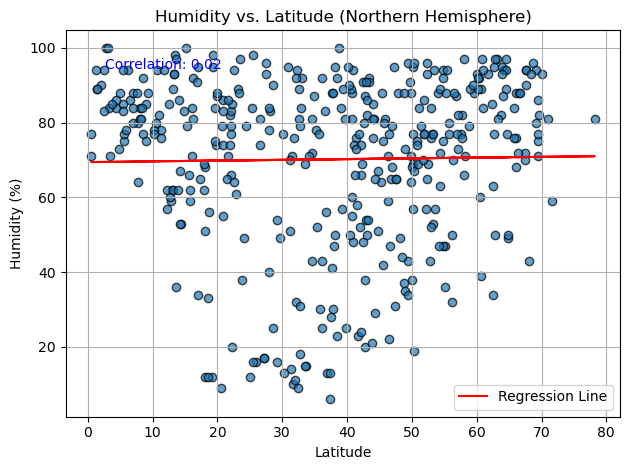

In [47]:
# Humidity vs. Latitude Linear Regression Plot
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)", "Humidity vs. Latitude (Northern Hemisphere)")


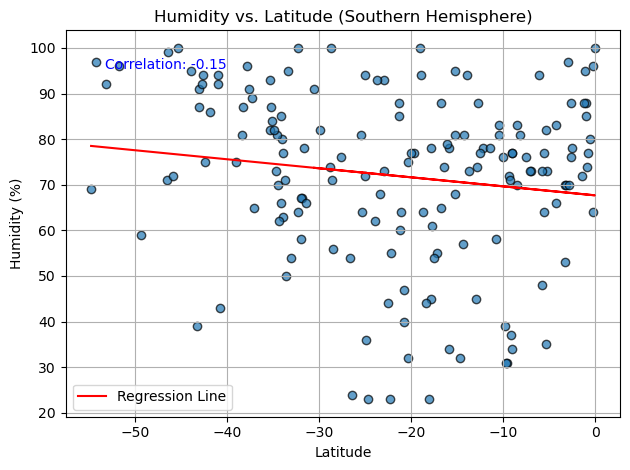

In [48]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)", "Humidity vs. Latitude (Southern Hemisphere)")


**Discussion about the linear relationship:** The scatter plot shows a weak negative linear relationship with a correlation of -0.15 between the two variables. While it provides some insight, we should consider practical implications, statistical significance, and potential limitations before making definitive conclusions. To get a comprehensive understanding of the relationship, further analysis and consideration of other variables are necessary.




### Cloudiness vs. Latitude Linear Regression Plot

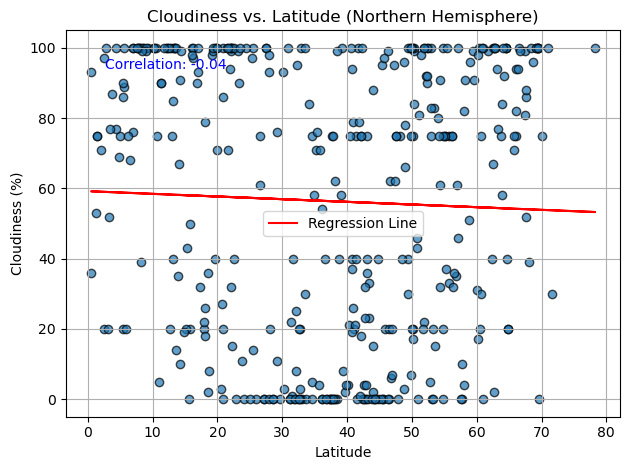

In [49]:
# Cloudiness vs. Latitude Linear Regression Plot
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness (%)", "Cloudiness vs. Latitude (Northern Hemisphere)")


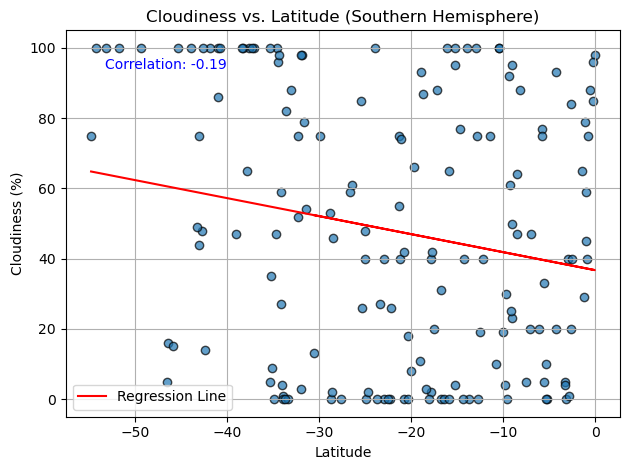

In [50]:
# Southern Hemispher
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness (%)", "Cloudiness vs. Latitude (Southern Hemisphere)")

**Discussion about the linear relationship:** The scatter plot shows a weak negative relationship between the variables, with a correlation coefficient of -0.19. Though the relationship is not very strong, it still gives us useful information about the data.

 Wind Speed vs. Latitude Linear Regression Plot

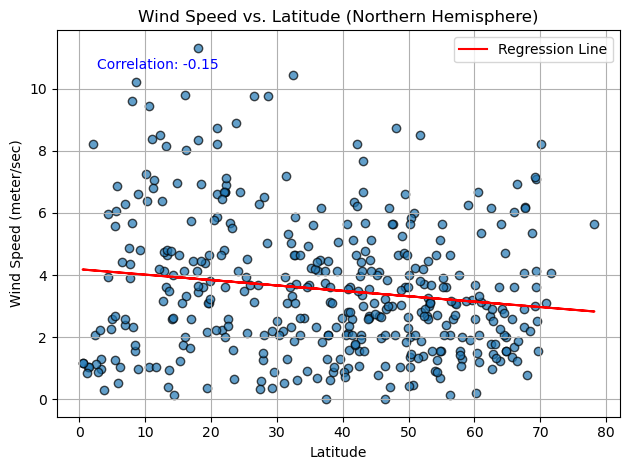

In [53]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed (meter/sec)", "Wind Speed vs. Latitude (Northern Hemisphere)")

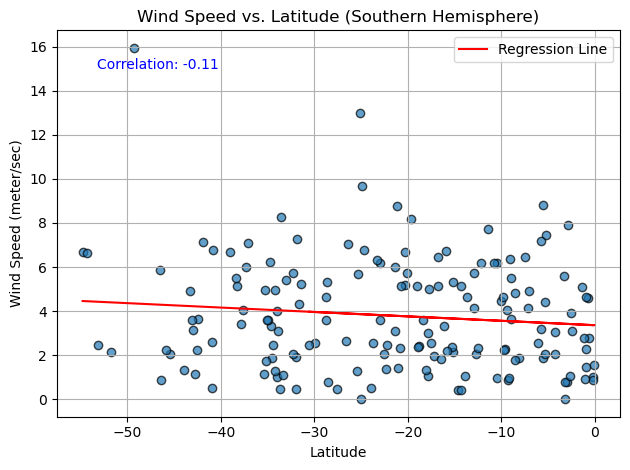

In [54]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed (meter/sec)", "Wind Speed vs. Latitude (Southern Hemisphere)")

**Discussion about the linear relationship:** 
The scatter plot displays a weak negative linear relationship between the two variables, as indicated by the correlation coefficient of -0.11. While the correlation coefficient provides important details about the direction and strength of the linear relationship, a comprehensive analysis requires considering both the scatter plot and the correlation coefficient.